In [1]:
from transformers import SamModel, SamConfig, SamProcessor
import torch
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")


model = SamModel(config=model_config)

model.load_state_dict(torch.load(r"F:\tooth-cavity-segmentation\mito_model_checkpoint_7.pth"))
     
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

f:\gpt\cuda\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

Loaded 520 images and 520 masks.
Image array shape: (520, 1024, 1280)
Mask array shape: (520, 1024, 1280)
Image shape: (2321, 256, 256)
Mask shape: (2321, 256, 256)


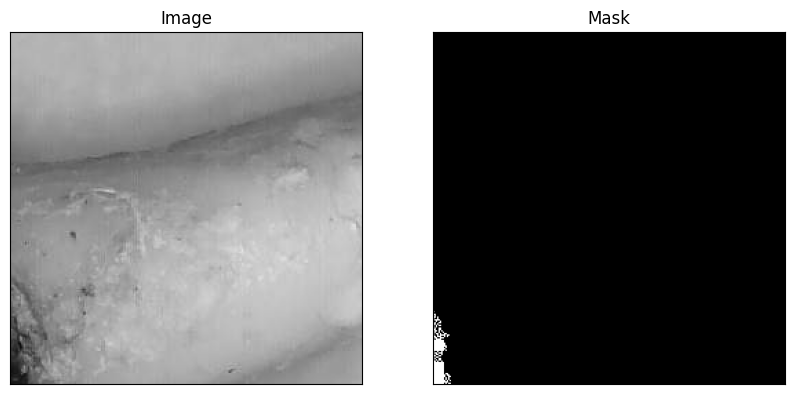

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)
pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])
Loaded 520 images and 520 masks.
Image array shape: (520, 1024, 1280)
Mask array shape: (520, 1024, 1280)
Image shape: (2321, 256, 256)
Mask shape: (2321, 256, 256)


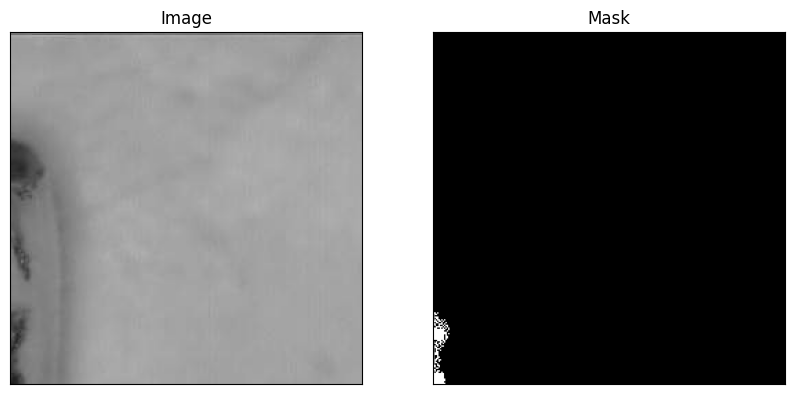

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


100%|██████████| 1161/1161 [1:34:09<00:00,  4.87s/it]


EPOCH: 8
Mean loss: 0.1958032786544544


100%|██████████| 1161/1161 [1:34:09<00:00,  4.87s/it]


EPOCH: 9
Mean loss: 0.1974502673868369


100%|██████████| 1161/1161 [1:34:11<00:00,  4.87s/it]


EPOCH: 10
Mean loss: 0.19207687172509286


100%|██████████| 1161/1161 [1:34:10<00:00,  4.87s/it]


EPOCH: 11
Mean loss: 0.1868002180180141


100%|██████████| 1161/1161 [1:34:06<00:00,  4.86s/it]


EPOCH: 12
Mean loss: 0.1843260408641448


100%|██████████| 1161/1161 [1:34:06<00:00,  4.86s/it]


EPOCH: 13
Mean loss: 0.18239675532837143


 58%|█████▊    | 673/1161 [1:47:15<1:38:09, 12.07s/it]

In [2]:
import os
import cv2
import numpy as np

# Define the paths to your folders
images_folder = r"F:\tooth-cavity-segmentation\data\train"
masks_folder = r"F:\tooth-cavity-segmentation\data\train_mask"

# Initialize empty lists to store image and mask arrays
image_arrays = []
mask_arrays = []

# Loop through all files in the images folder
for filename in os.listdir(images_folder):
  # Check if the file extension is JPG
  if filename.endswith(".jpg"):
    # Construct the full path to the image file
    image_path = os.path.join(images_folder, filename)
    
    # Load the image using OpenCV (BGR format)
    image = cv2.imread(image_path)
  
    # Check if image loaded successfully
    if image is not None:
      # Convert the image to RGB format (if needed)
      image_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_arrays.append(image_array)
    else:
      print(f"Error: Failed to load image {filename}")

# Loop through all files in the masks folder (assuming same names as images)
for filename in os.listdir(masks_folder):
  # Check if the file extension is JPG (or modify for your mask format)
  if filename.endswith(".jpg"):
    # Construct the full path to the mask file (assuming same filename as image)
    mask_path = os.path.join(masks_folder, filename)
    
    # Load the mask (adjust loading method based on mask format)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale masks

    # Check if mask loaded successfully
    if mask is not None:
      # Convert mask to NumPy array
      mask_array = np.asarray(mask)
      mask_arrays.append(mask_array)
    else:
      print(f"Error: Failed to load mask {filename}")

# Convert the lists to NumPy arrays (if needed)
image_arrays = np.array(image_arrays)
mask_arrays = np.array(mask_arrays)

# Print some information (optional)
print(f"Loaded {len(image_arrays)} images and {len(mask_arrays)} masks.")
print(f"Image array shape: {image_arrays.shape}")
print(f"Mask array shape: {mask_arrays.shape}")

from patchify import patchify
patch_size = 256
step = 256
all_img_patches = []
for img in range(image_arrays.shape[0]):
    image = image_arrays[img]
    patches_img = patchify(image, (patch_size,patch_size),step=step)
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            all_img_patches.append(single_patch_img)
images = np.array(all_img_patches)
all_mask_patches = []
for img in range(mask_arrays.shape[0]):
    mask = mask_arrays[img]
    patches_mask = patchify(mask, (patch_size,patch_size), step = step)
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = (single_patch_mask/255.).astype(np.uint8)
            all_mask_patches.append(single_patch_mask)
            
    masks = np.array(all_mask_patches)
images.shape
masks.shape
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)
from datasets import Dataset
from PIL import Image

dataset_dict = {
    "image":[Image.fromarray(img).convert("RGB") for img in filtered_images],
    "label":[Image.fromarray(img) for img in filtered_masks],
}

dataset = Dataset.from_dict(dataset_dict)
dataset
import random
import matplotlib.pyplot as plt

img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.show()
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)
    
    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
train_dataset = SAMDataset(dataset=dataset, processor=processor)
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)
import os
import cv2
import numpy as np

# Define the paths to your folders
images_folder = r"F:\tooth-cavity-segmentation\data\train"
masks_folder = r"F:\tooth-cavity-segmentation\data\train_mask"

# Initialize empty lists to store image and mask arrays
image_arrays = []
mask_arrays = []

# Loop through all files in the images folder
for filename in os.listdir(images_folder):
  # Check if the file extension is JPG
  if filename.endswith(".jpg"):
    # Construct the full path to the image file
    image_path = os.path.join(images_folder, filename)
    
    # Load the image using OpenCV (BGR format)
    image = cv2.imread(image_path)
  
    # Check if image loaded successfully
    if image is not None:
      # Convert the image to RGB format (if needed)
      image_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_arrays.append(image_array)
    else:
      print(f"Error: Failed to load image {filename}")

# Loop through all files in the masks folder (assuming same names as images)
for filename in os.listdir(masks_folder):
  # Check if the file extension is JPG (or modify for your mask format)
  if filename.endswith(".jpg"):
    # Construct the full path to the mask file (assuming same filename as image)
    mask_path = os.path.join(masks_folder, filename)
    
    # Load the mask (adjust loading method based on mask format)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale masks

    # Check if mask loaded successfully
    if mask is not None:
      # Convert mask to NumPy array
      mask_array = np.asarray(mask)
      mask_arrays.append(mask_array)
    else:
      print(f"Error: Failed to load mask {filename}")

# Convert the lists to NumPy arrays (if needed)
image_arrays = np.array(image_arrays)
mask_arrays = np.array(mask_arrays)

# Print some information (optional)
print(f"Loaded {len(image_arrays)} images and {len(mask_arrays)} masks.")
print(f"Image array shape: {image_arrays.shape}")
print(f"Mask array shape: {mask_arrays.shape}")

from patchify import patchify
patch_size = 256
step = 256
all_img_patches = []
for img in range(image_arrays.shape[0]):
    image = image_arrays[img]
    patches_img = patchify(image, (patch_size,patch_size),step=step)
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            all_img_patches.append(single_patch_img)
images = np.array(all_img_patches)
all_mask_patches = []
for img in range(mask_arrays.shape[0]):
    mask = mask_arrays[img]
    patches_mask = patchify(mask, (patch_size,patch_size), step = step)
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = (single_patch_mask/255.).astype(np.uint8)
            all_mask_patches.append(single_patch_mask)
            
    masks = np.array(all_mask_patches)
images.shape
masks.shape
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)
from datasets import Dataset
from PIL import Image

dataset_dict = {
    "image":[Image.fromarray(img).convert("RGB") for img in filtered_images],
    "label":[Image.fromarray(img) for img in filtered_masks],
}

dataset = Dataset.from_dict(dataset_dict)
dataset
import random
import matplotlib.pyplot as plt

img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.show()
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)
    
    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
train_dataset = SAMDataset(dataset=dataset, processor=processor)
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)
batch["ground_truth_mask"].shape

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')
error = []

from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 10

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch+8}')
    print(f'Mean loss: {mean(epoch_losses)}')
    error.append(mean(epoch_losses))
    torch.save(model.state_dict(), f"./mito_model_checkpoint_{epoch+2}.pth")
    
